# Chance of Admission(Exporatory Data Analysis)

This program determines the chnaces of graduate admission given the GRE Score, TOEFL Score, University Rating, Statement of Purpose, Letter of Recommendation, CGPA and number of research.

FEATURES

Serial No: Serial Number

GRE Score: Graduate Record Examination

TOEFL: Test of English as a Foreign Language

University Rating: Rating of university from 1-5

SOP: Statement of Purpose

LOR: Letter of Recommendation

CGPA: Undergraduate CGPA

Research: Number of Research Carried out

Chance of Admit: Chance of Admission


In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set the default style for plots
plt.style.use('dark_background')
colors = plt.rcParams["axes.prop_cycle"]()

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#print(plt.style.available)

In [4]:
#Reading the csv file
data = pd.read_csv('Admission_Predict.csv')

In [5]:
#Eyeballing the dataset
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
#Viewing data columns
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
#Produces a random sample from the data
data.sample(frac=.02)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
23,24,334,119,5,5.0,4.5,9.70,1,0.95
87,88,317,107,2,3.5,3.0,8.28,0,0.66
68,69,318,109,3,3.5,4.0,9.22,1,0.68
194,195,316,109,3,3.5,3.0,8.76,0,0.77
261,262,312,104,3,3.5,4.0,8.09,0,0.71
151,152,332,116,5,5.0,5.0,9.28,1,0.94
175,176,320,111,4,4.5,3.5,8.87,1,0.85
48,49,321,110,3,3.5,5.0,8.85,1,0.82


In [8]:
#Checking for unique values
data.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [9]:
#Dropping irrelevant column
data.drop(['Serial No.'], axis=1, inplace=True)

In [10]:
#shape of the dataset
print('\nShape of data :', data.shape)


Shape of data : (400, 8)


In [11]:
#Sorting values w.r.t a variable(GRE Column) in descending order
data.sort_values(by='GRE Score', ascending=False).head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
33,340,114,5,4.0,4.0,9.60,1,0.90
84,340,115,5,4.5,4.5,9.45,1,0.94
143,340,120,4,4.5,4.0,9.92,1,0.97
81,340,120,4,5.0,5.0,9.50,1,0.96
284,340,112,4,5.0,4.5,9.66,1,0.94
25,340,120,5,4.5,4.5,9.60,1,0.94
384,340,113,4,5.0,5.0,9.74,1,0.96
47,339,119,5,4.5,4.0,9.70,0,0.89
130,339,114,5,4.0,4.5,9.76,1,0.96


In [12]:
#Summary statistical description of dataset
data.describe(include="all")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [13]:
#Checking for missing or NaN values
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
#Resolving duplicates in the dataset
#data.duplicated().sum()
data.drop_duplicates(keep='first')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
#Checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [16]:
#Replace space in column names
#data.columns.str.replace(' ','')

Text(10.049999999999997, 0.5, 'counts')

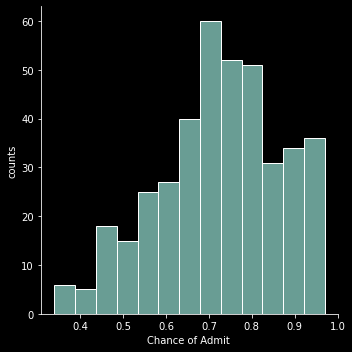

In [17]:
#Viewing the distribution of the data
sns.displot(data["Chance of Admit "])
plt.ylabel("counts")

In [18]:
#Rescaling the GRE Score into five ranges
pd.qcut(data['GRE Score'],5).value_counts()

(306.0, 314.0]      89
(289.999, 306.0]    82
(321.0, 327.0]      79
(314.0, 321.0]      79
(327.0, 340.0]      71
Name: GRE Score, dtype: int64

In [19]:
#This shows the GRE mean score within each of the five ranges of chance of admit
data['GRE Score'].groupby(pd.qcut(data['Chance of Admit '],5)).mean()

Chance of Admit 
(0.339, 0.61]    305.135802
(0.61, 0.7]      310.166667
(0.7, 0.764]     316.026667
(0.764, 0.86]    322.000000
(0.86, 0.97]     331.746667
Name: GRE Score, dtype: float64

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

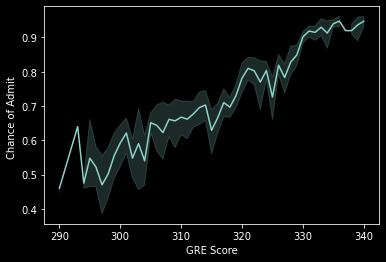

In [20]:
#Plotting GRE Score w.r.t. Chance of Admit
sns.lineplot(data=data, x="GRE Score", y="Chance of Admit ")

In [21]:
#Rescaling TOEFL Score into five scales 
pd.qcut(data['TOEFL Score'],5).value_counts()

(102.0, 106.0]     93
(91.999, 102.0]    90
(109.0, 113.0]     89
(113.0, 120.0]     68
(106.0, 109.0]     60
Name: TOEFL Score, dtype: int64

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

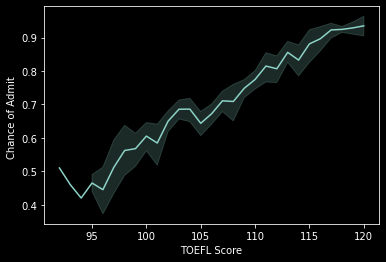

In [22]:
#Plotting TOEFL Score w.r.t. Chance of Admit
sns.lineplot(data=data, x="TOEFL Score", y="Chance of Admit ")

In [23]:
#This shows the TOEFL mean score within each of the five ranges of chance of admit
data['TOEFL Score'].groupby(pd.qcut(data['Chance of Admit '],5)).mean()

Chance of Admit 
(0.339, 0.61]    101.530864
(0.61, 0.7]      104.202381
(0.7, 0.764]     106.306667
(0.764, 0.86]    110.164706
(0.86, 0.97]     115.333333
Name: TOEFL Score, dtype: float64

In [24]:
#Counting the different values in the University Rating Column
data['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

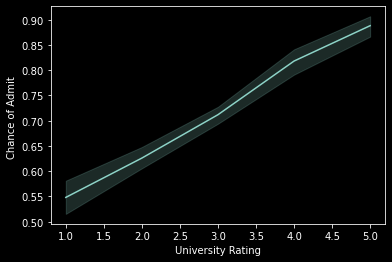

In [25]:
#Ploting University Rating w.r.t Chance of Admit
sns.lineplot(data=data, x="University Rating", y="Chance of Admit ")

In [26]:
#Value count for SOP
data['SOP'].value_counts()

3.5    70
4.0    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

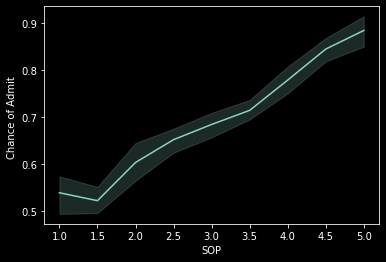

In [27]:
#Plotting SOP w.r.t Chance of Admit
sns.lineplot(data=data, x="SOP", y="Chance of Admit ")

In [28]:
#counting values in LOR
data['LOR '].value_counts()

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR , dtype: int64

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

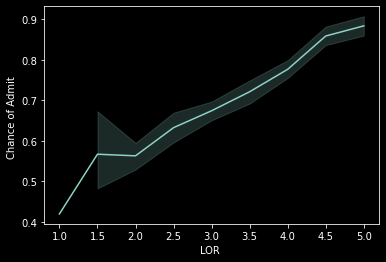

In [29]:
#Plotting LOR w.r.t Chance of Admit
sns.lineplot(data=data, x="LOR ", y="Chance of Admit ")

In [30]:
#Rescaling the value count of CGPA to fall between 5 ranges
pd.qcut(data['CGPA'],5).value_counts()

(8.446, 8.76]                 86
(6.7989999999999995, 8.07]    81
(9.13, 9.92]                  79
(8.07, 8.446]                 79
(8.76, 9.13]                  75
Name: CGPA, dtype: int64

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

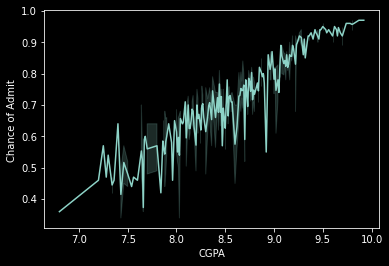

In [31]:
#Plotting CGPA w.r.t Chance of Admit
sns.lineplot(data=data, x="CGPA", y="Chance of Admit ")

In [32]:
#Value counts of values in Research
data['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

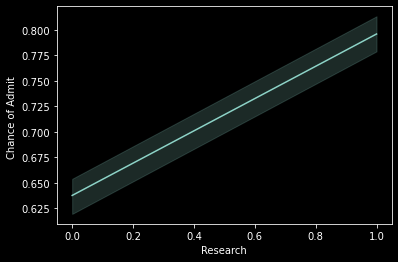

In [33]:
#Plotting Reseacrh w.r.t Chance of Admit
sns.lineplot(data=data, x="Research", y="Chance of Admit ")

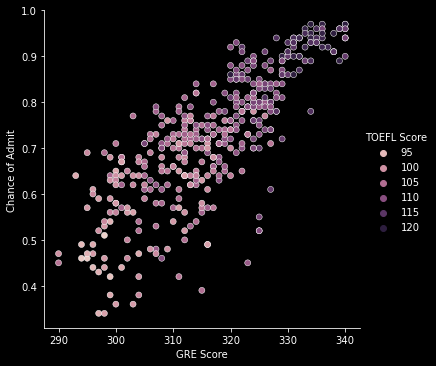

In [68]:
sns.relplot(x ="GRE Score", y ="Chance of Admit ", hue="TOEFL Score", data = data)

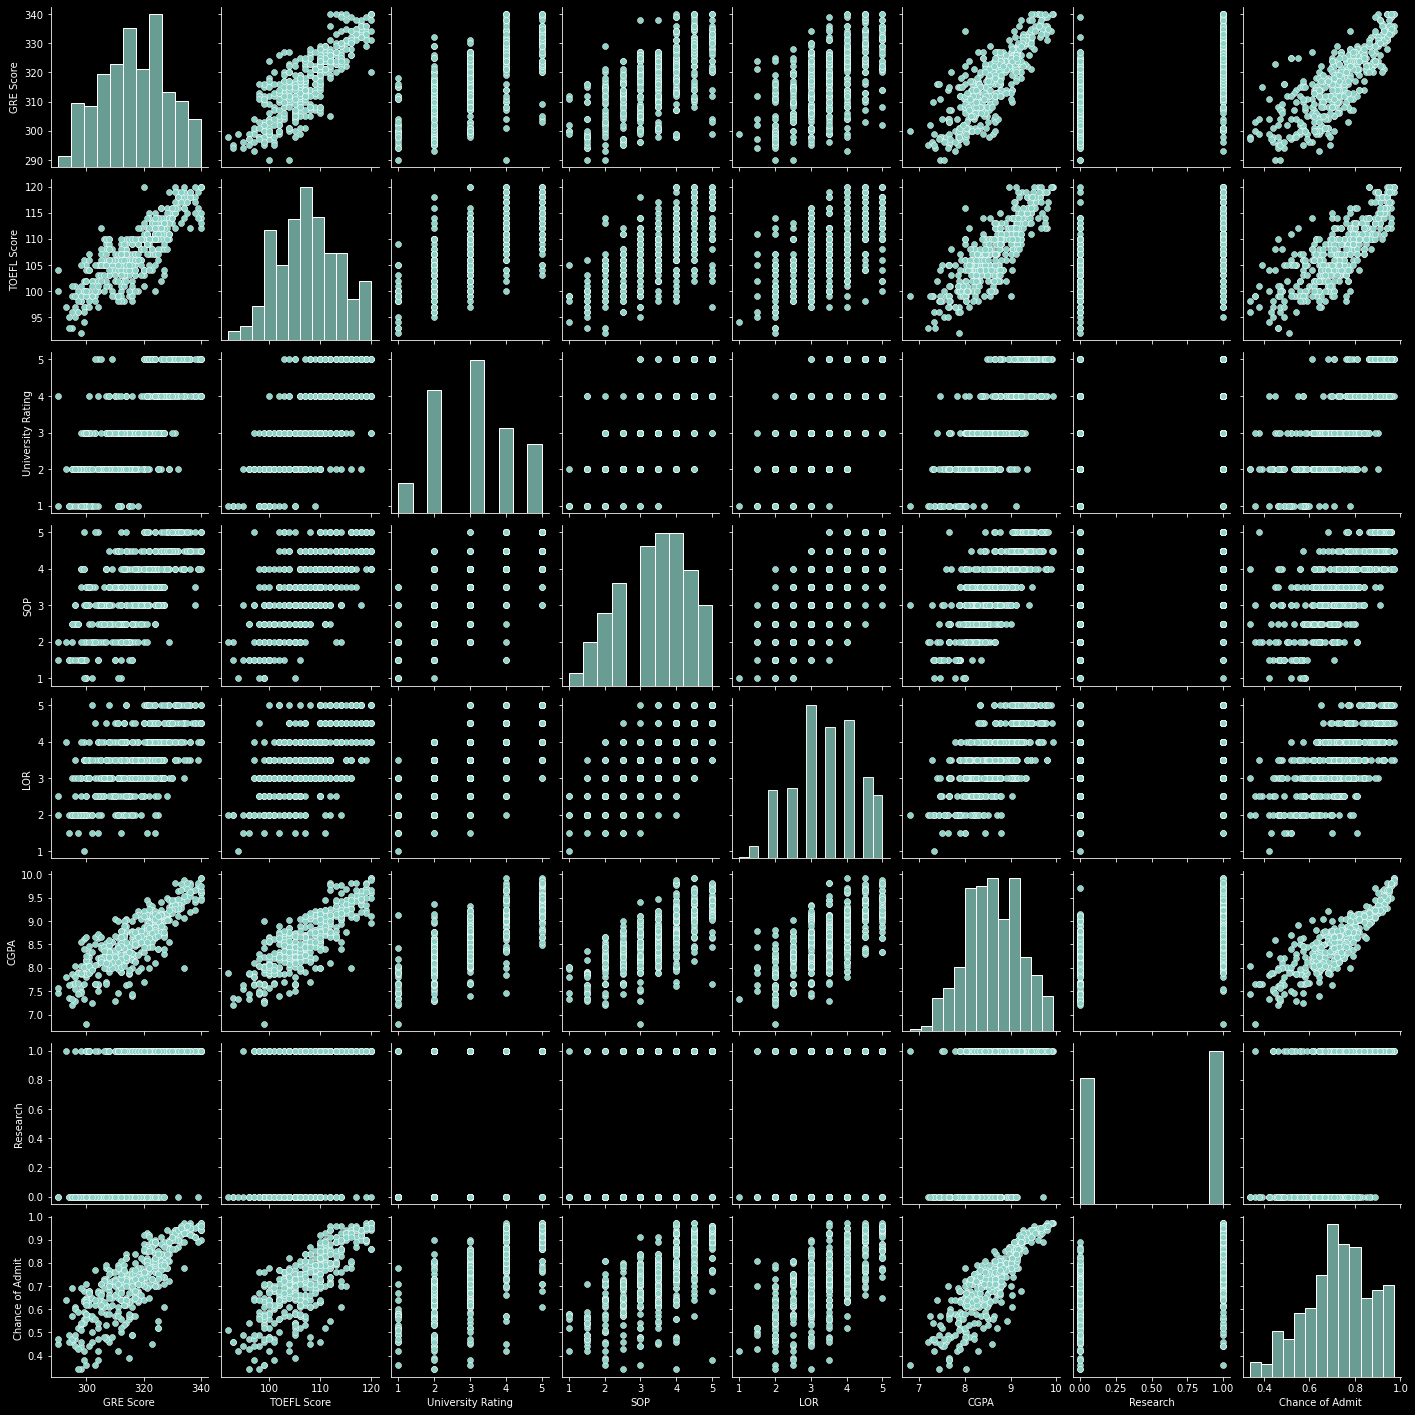

In [69]:
#Pairplot Visualisation
sns.pairplot(data)

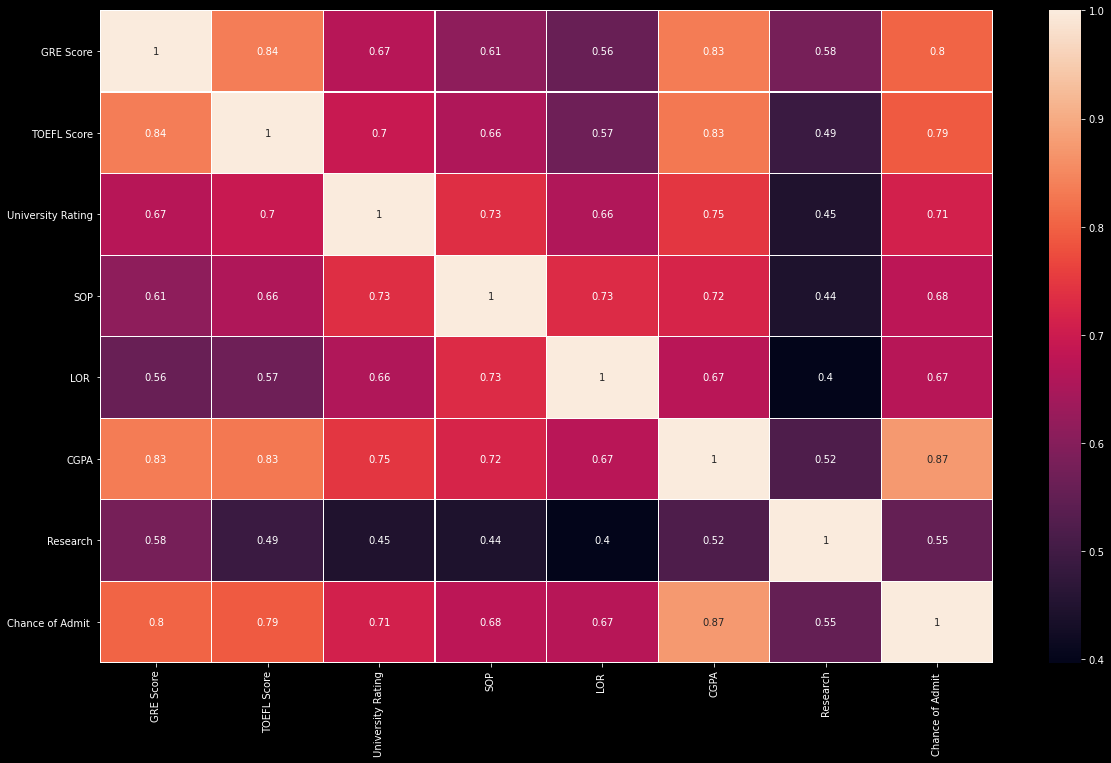

In [35]:
#checking the correlation between features
sns.heatmap(data.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# MACHINE LEARNING MODEL
Linear Regression

In [60]:
#Setting your columns into attributes and label
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y = data['Chance of Admit ']

In [61]:
#Importing the training and testing library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [62]:
#Creating the object of the Linear Regression model
model = LinearRegression(normalize=False)

#Fit the model with the training data
model.fit(X_train,y_train)

#Checking the accuracy of the train and test data
print("Score of the train set",model.score(X_train,y_train))
print("Score of the test set",model.score(X_test,y_test))

Score of the train set 0.8019807331500792
Score of the test set 0.7955991554684618


In [63]:
#Retrieving the coefficient of determination(indicates the goodness of fit)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8019807331500792


In [64]:
#Retrieving the intercept and slope of the regression
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -1.2841780563001732
slope: [0.00183981 0.00317072 0.00486626 0.00099469 0.0136946  0.11781823
 0.01843913]


In [65]:
#Retrieving the slope of the labels
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
GRE Score,0.001840
TOEFL Score,0.003171
University Rating,0.004866
SOP,0.000995
LOR,0.013695
CGPA,0.117818
Research,0.018439


# Prediction

In [55]:
#Predict the target on the train dataset
predict_y = model.predict(X_train)

In [56]:
#To compare the actual output values for train_x with the predicted values, execute the following
df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_y})
df

,Actual,Predicted
0,0.65,0.633216
1,0.68,0.703742
2,0.65,0.659465
3,0.42,0.448315
4,0.97,0.960613
...,...,...
275,0.96,0.955242
276,0.87,0.858647
277,0.72,0.651938
278,0.57,0.473773


In [66]:
#Predict the target on the testing dataset
predict_y = model.predict(X_test) 

In [58]:
#To compare the actual output values for test_x with the predicted values, execute the following
df = pd.DataFrame({'Actual':y_test, 'Predicted': predict_y})
df

,Actual,Predicted
0,0.68,0.647342
1,0.68,0.721659
2,0.90,0.935403
3,0.79,0.820790
4,0.44,0.577812
...,...,...
115,0.48,0.609524
116,0.46,0.452493
117,0.93,0.885128
118,0.74,0.773261


# Metrics

In [59]:
#Importing the metric library
from sklearn import metrics

#Checking the error percentage in the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_y)))

Mean Absolute Error: 0.049478387104195984
Mean Squared Error: 0.004652821846481277
Root Mean Squared Error: 0.06821159612911339
